# Sentiment Analysis of Real-time Flipkart Product Reviews

**Objective**

The objective of this project is to classify customer reviews as positive or negative and understand the pain points of customers who write negative reviews. By analyzing the sentiment of reviews, we aim to gain insights into product features that contribute to customer satisfaction or dissatisfaction.


**Dataset**

The dataset consists of 8,518 reviews for the "YONEX MAVIS 350 Nylon Shuttle" product from Flipkart. Each review includes features such as Reviewer Name, Rating, Review Title, Review Text, Place of Review, Date of Review, Up Votes, and Down Votes.



---



**Importing Libraries**


---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

**Reading Dataset**


---



In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


**Data Information**


---



In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


**Data Cleaning**


---



In [5]:
data[data['Reviewer Name'].isna()]

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
8508,NaN,NaN,NaN,NaN,NaN,NaN,No complaints about the item . Its the best on...,5
8509,NaN,NaN,NaN,NaN,NaN,NaN,Not sure why we have charged for this product ...,1
8510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [6]:
data = data.dropna()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8013 entries, 0 to 8507
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8013 non-null   object 
 1   Review Title     8013 non-null   object 
 2   Place of Review  8013 non-null   object 
 3   Up Votes         8013 non-null   float64
 4   Down Votes       8013 non-null   float64
 5   Month            8013 non-null   object 
 6   Review text      8013 non-null   object 
 7   Ratings          8013 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 563.4+ KB


In [8]:
data.duplicated().any().any()

False

**Data Analysis**


---



<Axes: xlabel='Ratings', ylabel='count'>

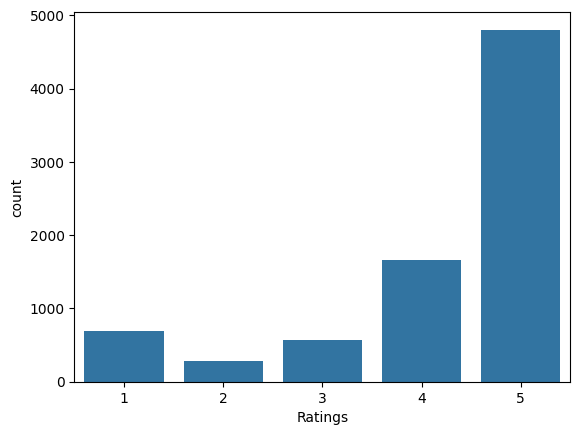

In [9]:
sns.countplot(x='Ratings', data=data)

In [10]:
data['label'] = data['Ratings'].apply(lambda x: 'Negative' if x<=2 else 'Positive')

In [11]:
data.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,label
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,Positive
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,Negative
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,Negative
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.READ MORE,5,Positive
6,Flipkart Customer,Must buy!,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,BEST PURCHASE It is a good quality and is more...,5,Positive


<Axes: xlabel='label', ylabel='count'>

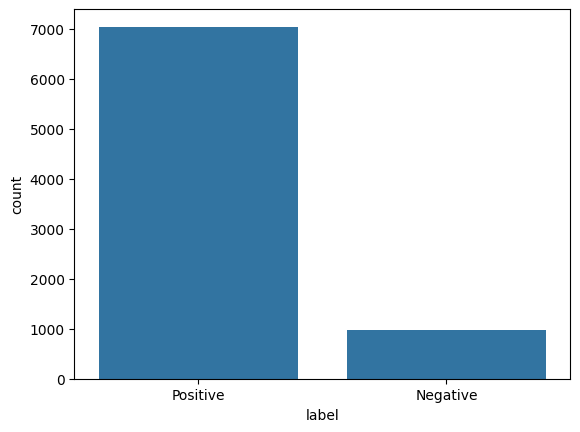

In [12]:
sns.countplot(x='label', data=data)

**Data Preparation**

 Split the data into train and test set

---



In [13]:
data['Review text'] = data['Review text'].str.replace('READ MORE', '')

In [14]:
X = data['Review text']
y = data['label']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size=0.2, random_state=42)

In [16]:
X_train.head()

250     Product is good as like as bought in the open ...
7735                                           Love it...
2805                                                 Good
4914                                                super
1539                                            excellent
Name: Review text, dtype: object

In [17]:
X_train.shape

(6410,)

**Data Preprocessing**

---



In [18]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [19]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shrad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
def preprocess(raw_text, flag):
  sentence = re.sub("[^a-zA-Z]"," ", raw_text)
  sentence = sentence.lower()
  tokens = sentence.split()
  clean_tokens = [t for t in tokens if not t in stopwords.words('english')]
  if (flag == 'stem'):
    clean_tokens = [stemmer.stem(word) for word in clean_tokens]
  else:
    clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
  return pd.Series([" ".join(clean_tokens), len(clean_tokens)])


In [23]:
from tqdm import tqdm, tqdm_notebook

In [24]:
tqdm.pandas()

In [25]:
df_train = X_train.progress_apply(lambda x: preprocess(x, 'stem'))

100%|██████████| 6410/6410 [00:05<00:00, 1113.46it/s]


In [26]:
df_train.columns = ['clean_text_stem', 'clean_text_len']

In [27]:
df_train.head()

,clean_text_stem,clean_text_len
250,product good like bought open market price als...,16
7735,love,1
2805,good,1
4914,super,1
1539,excel,1


In [28]:
df_test = X_test.progress_apply(lambda x: preprocess(x, 'stem'))

100%|██████████| 1603/1603 [00:01<00:00, 1143.78it/s]


In [29]:
df_test.columns = ['clean_text_stem', 'clean_text_len']

In [30]:
df_test.head()

,clean_text_stem,clean_text_len
1880,nice product deliv ontim,4
2188,good one problem day,4
7075,super,1
4967,genuin product go,3
3822,nice,1


**WordCloud**

---



In [31]:
from wordcloud import WordCloud

In [32]:
wc = df_train[y_train == 'Negative']

In [33]:
wc.head()

,clean_text_stem,clean_text_len
6858,worst standard pack product box alreadi crush ...,27
1948,disappoint one shuttl proper rest swing,6
4053,slow,1
288,poor product,2
4970,good,1


In [34]:
words = ' '.join(wc['clean_text_stem'])
cleaned_words = " ".join([word for word in words.split()
if 'subject' not in word])

In [35]:
df_wordcloud = WordCloud(stopwords=stopwords.words('english'),
                         background_color = 'black',
                         width=500,
                         height=500).generate(cleaned_words)



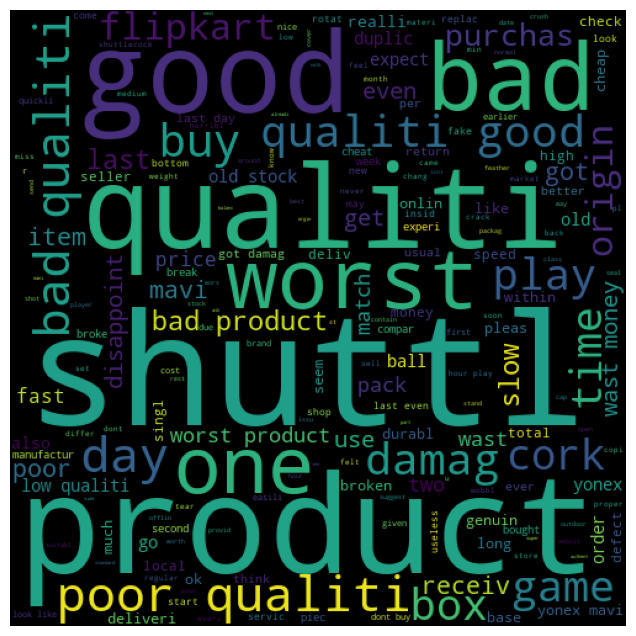

In [36]:
plt.figure(1,figsize=(15,8))
plt.imshow(df_wordcloud)
plt.axis('off')
plt.show()

**Feature Extraction**

---



In [37]:
from sklearn.feature_extraction.text import CountVectorizer
vocab = CountVectorizer()

In [38]:
X_train_bow = vocab.fit_transform(df_train['clean_text_stem'])
X_test_bow = vocab.transform(df_test['clean_text_stem'])



**Model Building**

---



Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_bow, y_train)

LogisticRegression()

In [40]:
y_test_pred = classifier.predict(X_test_bow)

In [41]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test))

0.924516531503431
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       198
    Positive       1.00      1.00      1.00      1405

    accuracy                           1.00      1603
   macro avg       1.00      1.00      1.00      1603
weighted avg       1.00      1.00      1.00      1603



In [42]:
y_train_pred =classifier.predict(X_train_bow)

Text(0.5, 23.52222222222222, 'Predicted')

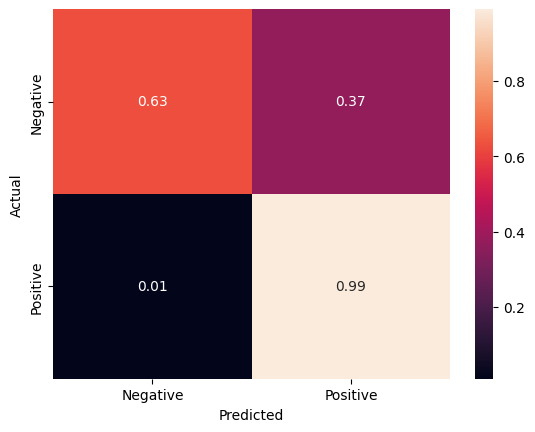

In [43]:
cm = metrics.confusion_matrix(y_train,y_train_pred)
actual = np.sum(cm,axis=1).reshape(-1,1)
cmn = np.round(cm/actual,2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [44]:
y_test_pred = classifier.predict(X_test_bow)

Text(50.722222222222214, 0.5, 'Predict')

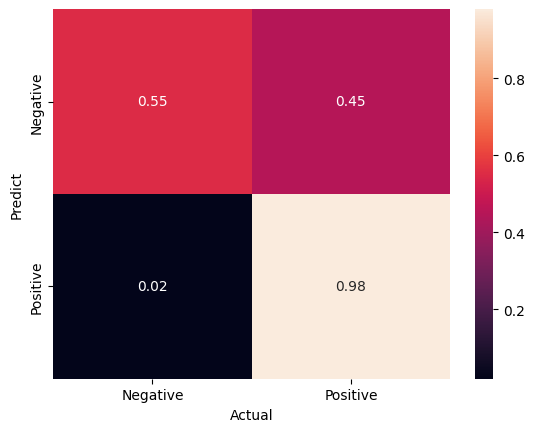

In [45]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
actual = np.sum(cm,axis=1).reshape(-1,1)
cmn = np.round(cm/actual,2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Actual')
plt.ylabel('Predict')

Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_bow,y_train)

DecisionTreeClassifier()

In [47]:
y_test_pred = classifier.predict(X_test_bow)

In [48]:
print(accuracy_score(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

0.8945726762320648
              precision    recall  f1-score   support

    Negative       0.58      0.53      0.55       198
    Positive       0.93      0.95      0.94      1405

    accuracy                           0.89      1603
   macro avg       0.76      0.74      0.75      1603
weighted avg       0.89      0.89      0.89      1603



In [49]:
y_train_pred =classifier.predict(X_train_bow)

Text(0.5, 23.52222222222222, 'Predicted')

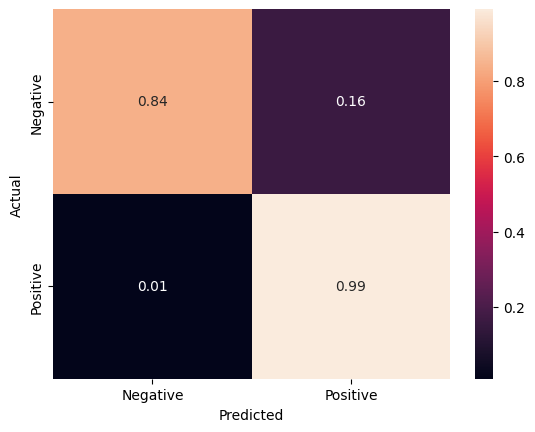

In [50]:
cm = metrics.confusion_matrix(y_train,y_train_pred)
actual = np.sum(cm,axis=1).reshape(-1,1)
cmn = np.round(cm/actual,2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [51]:
y_test_pred = classifier.predict(X_test_bow)

Text(50.722222222222214, 0.5, 'Predict')

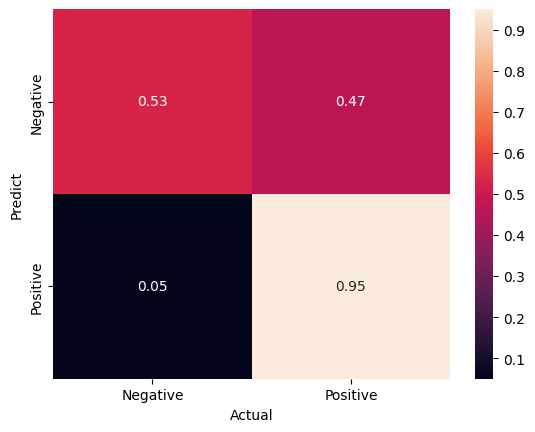

In [52]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
actual = np.sum(cm,axis=1).reshape(-1,1)
cmn = np.round(cm/actual,2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Actual')
plt.ylabel('Predict')

Random Forest




In [53]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_bow,y_train)

RandomForestClassifier()

In [54]:
y_train_pred =classifier.predict(X_train_bow)

Text(0.5, 23.52222222222222, 'Predicted')

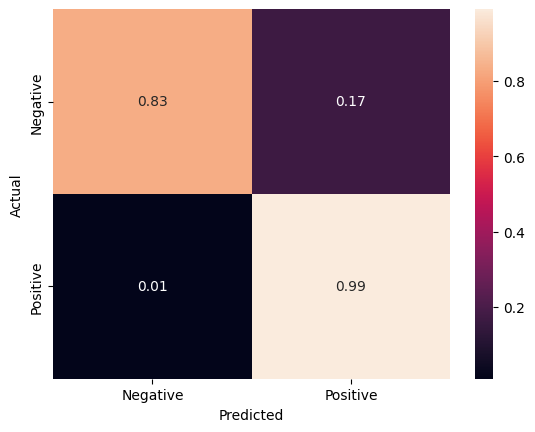

In [55]:
cm = metrics.confusion_matrix(y_train,y_train_pred)
actual = np.sum(cm,axis=1).reshape(-1,1)
cmn = np.round(cm/actual,2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')


In [56]:
y_test_pred = classifier.predict(X_test_bow)

Text(50.722222222222214, 0.5, 'Predict')

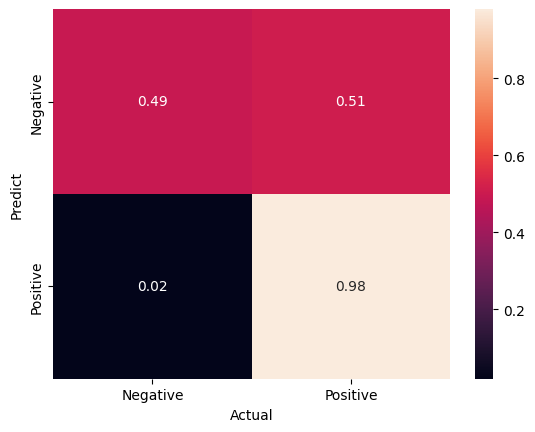

In [57]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
actual = np.sum(cm,axis=1).reshape(-1,1)
cmn = np.round(cm/actual,2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Actual')
plt.ylabel('Predict')

In [58]:
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

0.9195258889582034
              precision    recall  f1-score   support

    Negative       0.78      0.49      0.60       198
    Positive       0.93      0.98      0.96      1405

    accuracy                           0.92      1603
   macro avg       0.85      0.73      0.78      1603
weighted avg       0.91      0.92      0.91      1603



**Hyperparameter Tuning**

---



In [59]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import joblib
from joblib import Memory
import os
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

In [60]:
import string

In [89]:
negation_words = ["not", "no", "never", "n't", "nobody", "nothing", "nowhere", "none", "don't", "didn't", "wouldn't", "shouldn't", "couldn't", "cannot", "can't"]


In [87]:
def clean(doc):
    sentence = re.sub("[^a-zA-Z]"," ",doc)


    doc = doc.lower()


    tokens = nltk.word_tokenize(doc)


    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]


    stop_words = set(stopwords.words('english'))
    filtered_tokens = []
    for i, word in enumerate(lemmatized_tokens):
        if word.lower() in negation_words:
            if i+1 < len(lemmatized_tokens) and lemmatized_tokens[i+1].lower() not in stop_words:
                filtered_tokens.append("not_" + lemmatizer.lemmatize(lemmatized_tokens[i+1]))
        else:
            filtered_tokens.append(word)

    return " ".join(filtered_tokens)

In [62]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shrad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [90]:
%time X_train_clean = X_train.apply(lambda doc: clean(doc))
%time X_test_clean = X_test.apply(lambda doc: clean(doc))

CPU times: total: 562 ms
Wall time: 1.62 s
CPU times: total: 203 ms
Wall time: 401 ms


In [64]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

In [91]:
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['elasticnet'],
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='f1_macro',
                               return_train_score=True,
                               verbose=1
                              )

    %time grid_search.fit(X_train_clean, y_train)

    best_models[algo] = grid_search.best_estimator_
    print('Score on Test Data: ', grid_search.score(X_test_clean, y_test))

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: total: 2.73 s
Wall time: 7.98 s
Score on Test Data:  0.8353787696285583
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: total: 13.2 s
Wall time: 40 s
Score on Test Data:  0.8184589603944443
********** logistic_regression **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: total: 2min 51s
Wall time: 7min 33s
Score on Test Data:  0.8337668047968076


In [92]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', TfidfVectorizer(max_features=2000)),
                ('classifier', DecisionTreeClassifier())])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=2000)),
                ('classifier',
                 LogisticRegression(C=1, class_weight='balanced', l1_ratio=0.4,
                                    penalty='elasticnet', solver='saga'))])



In [93]:
for name, model in best_models.items():
    print("*"*10, name, "*"*10)

    joblib.dump(model, f'best_models/{name}.pkl')
    model = joblib.load(f'best_models/{name}.pkl')

    %time y_test_pred = model.predict(X_test_clean)
    pos_label = 'Positive'
    print("Test Score (F1)", metrics.f1_score(y_test, y_test_pred,pos_label=pos_label))

    print("Model Size:", os.path.getsize(f'best_models/{name}.pkl'), "Bytes")

********** naive_bayes **********
CPU times: total: 15.6 ms
Wall time: 17.9 ms
Test Score (F1) 0.9623106727721029
Model Size: 78439 Bytes
********** decision_tree **********
CPU times: total: 0 ns
Wall time: 11.9 ms
Test Score (F1) 0.956398440269408
Model Size: 167725 Bytes
********** logistic_regression **********
CPU times: total: 0 ns
Wall time: 19.1 ms
Test Score (F1) 0.9548899314326957
Model Size: 83674 Bytes


In [94]:
model = joblib.load('best_models/naive_bayes.pkl')
df = ['bad quality product']
predict = model.predict(df)
print(predict)

['Positive']


In [98]:

model = joblib.load('best_models/logistic_regression.pkl')
df = ['Not good quality product']
predict = model.predict(df)
print(predict)

['Positive']


In [101]:
model = joblib.load('best_models/decision_tree.pkl')
df = ['Cheap product quality']
predict = model.predict(df)
print(predict)

['Negative']
